In [0]:
storage_account_name = "ist615team7"
storage_account_access_key = "RsX1LGp9yEs70bWKxf4QjKixg4DeSmqSwJuFyf5er6Ny2MoLsEXO6G8WFOIL2HLPTQ2sizIIST+3+AStAiJw4g=="

In [0]:
file_location = "wasbs://ist615team7file@ist615team7.blob.core.windows.net/vehicles_cleaned.csv"
file_type = "csv"
#https://ist615team7.blob.core.windows.net/ist615team7file/vehicles_cleaned.csv

In [0]:
spark.conf.set(
  "fs.azure.account.key."+storage_account_name+".blob.core.windows.net",
  storage_account_access_key)

In [0]:
output_container_path = "wasbs://predictions@ist615team7.blob.core.windows.net"
output_blob_folder = "%s/predictions" % output_container_path

In [0]:
#dbutils.fs.ls(f"wasbs://{container}@{storage_account_name}.blob.core.windows.net/")

In [0]:
df = spark.read.format(file_type).option("inferSchema", "true").option("header", "true").load(file_location)
#df = spark.read.option("header", "true").option("inferschema", "true").option("delimiter", ",").csv(f"wasbs://{container}@{storage_account_name}.blob.core.windows.net/vehicle_cleaned.csv")

In [0]:
df_pd = df.toPandas()

In [0]:
df_pd.head(5)

Out[8]:

,id,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,image_url,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,None,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590,-85.4800,2021-05-04 17:31:18
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,None,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590,-85.4800,2021-05-04 17:31:08
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,None,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,al,32.590,-85.4800,2021-05-04 17:31:25
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,None,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,al,32.590,-85.4800,2021-05-04 15:41:31
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,None,rwd,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592,-85.5189,2021-05-03 19:02:03


In [0]:
df_pd.describe()

Out[9]:

,id,price,year,odometer,lat,long
count,2.368340e+05,2.368340e+05,236834.000000,2.368340e+05,236834.000000,236834.000000
mean,7.311498e+09,6.131389e+04,2011.136784,9.514290e+04,38.122128,-92.405324
std,4.430672e+06,1.139505e+07,9.151768,1.975979e+05,5.359670,17.039208
min,7.301583e+09,0.000000e+00,1900.000000,0.000000e+00,-81.838232,-159.827728
25%,7.308150e+09,6.500000e+03,2008.000000,3.357000e+04,34.262497,-104.823110
50%,7.312703e+09,1.459000e+04,2013.000000,8.300000e+04,38.912000,-86.196093
75%,7.315315e+09,2.699000e+04,2017.000000,1.342000e+05,41.998929,-80.173900
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.252826,173.885502


In [0]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236834 entries, 0 to 236833
Data columns (total 22 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 id 236834 non-null int64 
 1 url 236834 non-null object 
 2 region 236834 non-null object 
 3 price 236834 non-null int64 
 4 year 236834 non-null float64 
 5 manufacturer 236834 non-null object 
 6 model 236834 non-null object 
 7 condition 236834 non-null object 
 8 cylinders 170282 non-null object 
 9 fuel 236834 non-null object 
 10 odometer 236834 non-null float64 
 11 title_status 231391 non-null object 
 12 transmission 236834 non-null object 
 13 VIN 145285 non-null object 
 14 drive 179751 non-null object 
 15 type 207626 non-null object 
 16 paint_color 188570 non-null object 
 17 image_url 236834 non-null object 
 18 state 236834 non-null object 
 19 lat 236834 non-null float64 
 20 long 236834 non-null float64 
 21 posting_date 236834 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(15)
memory usage: 39.8+ MB

In [0]:
df_pd.isna().sum()

Out[11]: id 0
url 0
region 0
price 0
year 0
manufacturer 0
model 0
condition 0
cylinders 66552
fuel 0
odometer 0
title_status 5443
transmission 0
VIN 91549
drive 57083
type 29208
paint_color 48264
image_url 0
state 0
lat 0
long 0
posting_date 0
dtype: int64

In [0]:
df_pd.duplicated().value_counts()

Out[12]: False 236834
dtype: int64

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
df_pd['year']=pd.to_datetime(df_pd['year'],errors='ignore',format='%y')

In [0]:
#keeping only columns needed for price prediction
#removing url, image_url, VIN, lat, long, posting_date
df = df_pd.drop(['url','image_url','VIN','lat','long'], axis=1)
df.shape

Out[15]: (236834, 17)

In [0]:
#new column for posted month and year
df['posted_monthyear'] = pd.to_datetime(df['posting_date'],utc=True).apply(lambda x: x.strftime('%B-%Y')
                                                            if not pd.isnull(x) else '')
df['posted_monthyear']

Out[16]: 0 May-2021
1 May-2021
2 May-2021
3 May-2021
4 May-2021
 ... 
236829 April-2021
236830 April-2021
236831 April-2021
236832 April-2021
236833 April-2021
Name: posted_monthyear, Length: 236834, dtype: object

In [0]:
#dropping original posted date column
df = df.drop(['posting_date'], axis=1)
df.shape

Out[17]: (236834, 17)

In [0]:
df.head()

Out[18]:

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posted_monthyear
0,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,None,pickup,white,al,May-2021
1,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,None,pickup,blue,al,May-2021
2,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,None,pickup,red,al,May-2021
3,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,None,pickup,red,al,May-2021
4,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,May-2021


In [0]:
df['posted_monthyear'].unique()

Out[19]: array(['May-2021', 'April-2021'], dtype=object)

In [0]:
#drop all concurrent missing values in the below columns
df.dropna(subset=['cylinders', 'title_status', 'drive', 'type', 'paint_color'], axis=0, how='all', inplace=True)
df.shape

Out[20]: (236833, 17)

In [0]:
#drop rows with at least 3 NA values
df.dropna(subset=['cylinders', 'title_status', 'drive', 'type', 'paint_color'], axis=0, thresh=3, inplace=True)
df.shape

Out[21]: (217431, 17)

In [0]:
df.isna().sum()

Out[22]: id 0
region 0
price 0
year 0
manufacturer 0
model 0
condition 0
cylinders 53072
fuel 0
odometer 0
title_status 2197
transmission 0
drive 39217
type 17567
paint_color 31414
state 0
posted_monthyear 0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217431 entries, 0 to 236833
Data columns (total 17 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 id 217431 non-null int64 
 1 region 217431 non-null object 
 2 price 217431 non-null int64 
 3 year 217431 non-null int64 
 4 manufacturer 217431 non-null object 
 5 model 217431 non-null object 
 6 condition 217431 non-null object 
 7 cylinders 164359 non-null object 
 8 fuel 217431 non-null object 
 9 odometer 217431 non-null float64
 10 title_status 215234 non-null object 
 11 transmission 217431 non-null object 
 12 drive 178214 non-null object 
 13 type 199864 non-null object 
 14 paint_color 186017 non-null object 
 15 state 217431 non-null object 
 16 posted_monthyear 217431 non-null object 
dtypes: float64(1), int64(3), object(13)
memory usage: 29.9+ MB

In [0]:
def piefig(name,tname):
    plt.figure(figsize=(10,10))
    plt.pie(df[name].value_counts())
    plt.title(tname+' Density Index')
    plt.legend(df[name].unique())
    plt.show()

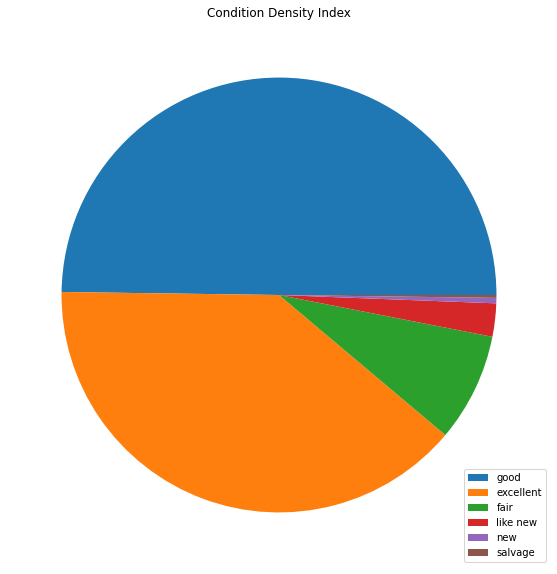

In [0]:
piefig('condition','Condition')

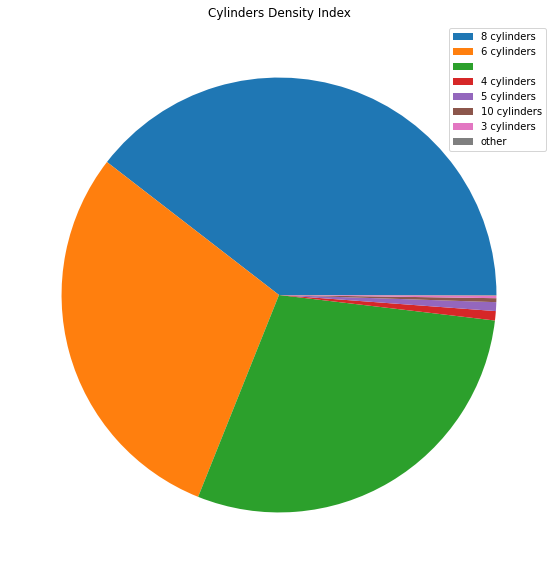

In [0]:
piefig('cylinders','Cylinders')

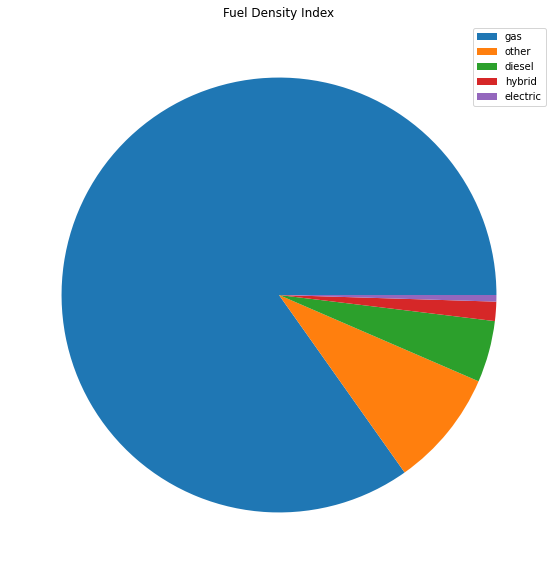

In [0]:
piefig('fuel','Fuel')

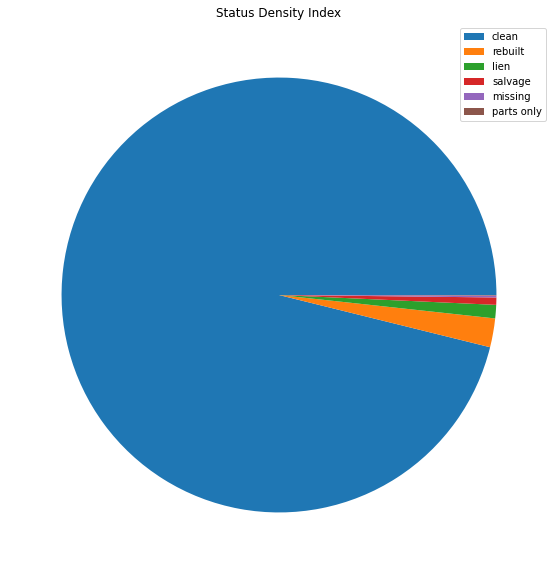

In [0]:
piefig('title_status','Status')

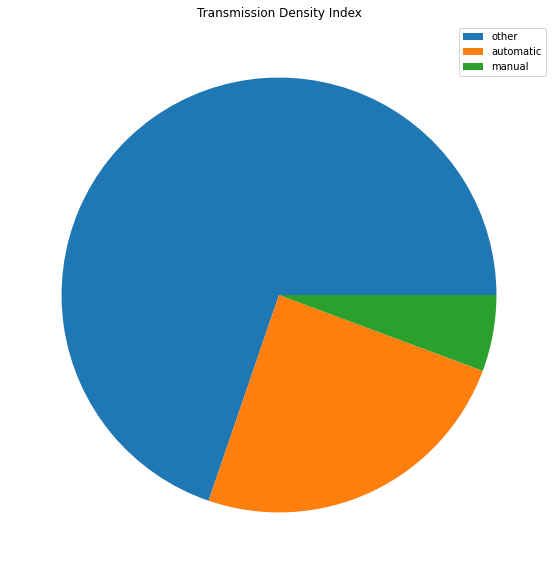

In [0]:
piefig('transmission','Transmission')

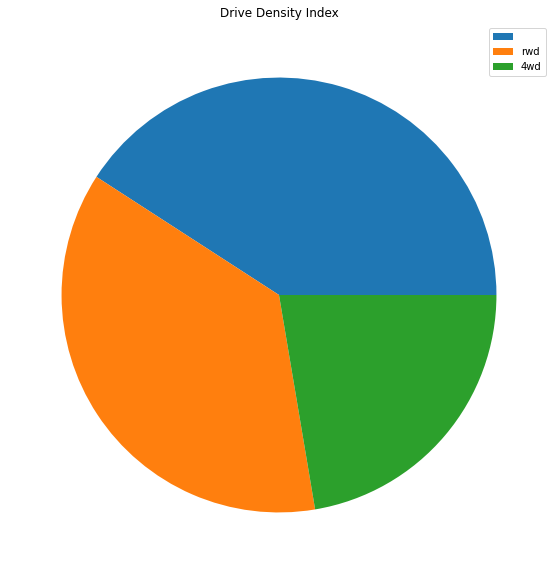

In [0]:
piefig('drive','Drive')

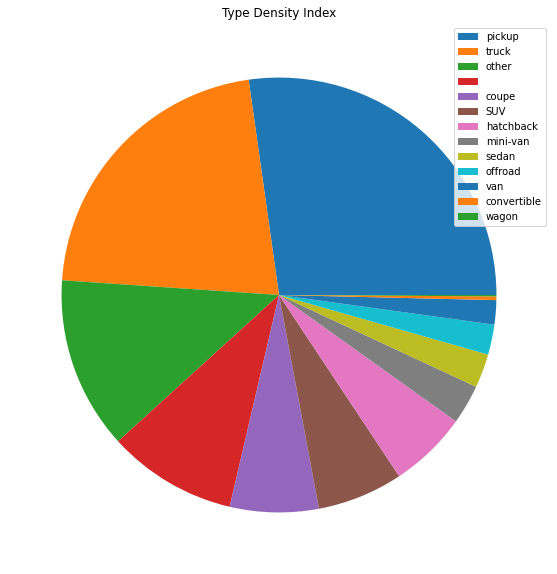

In [0]:
piefig('type','Type')

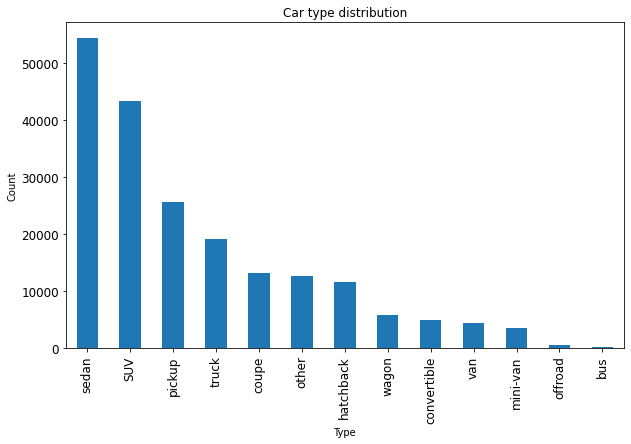

In [0]:
plt.figure(figsize=(10,6))
df.type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car type distribution')
plt.ylabel('Count')
plt.xlabel('Type')
plt.tick_params(labelsize=12)
plt.grid([])

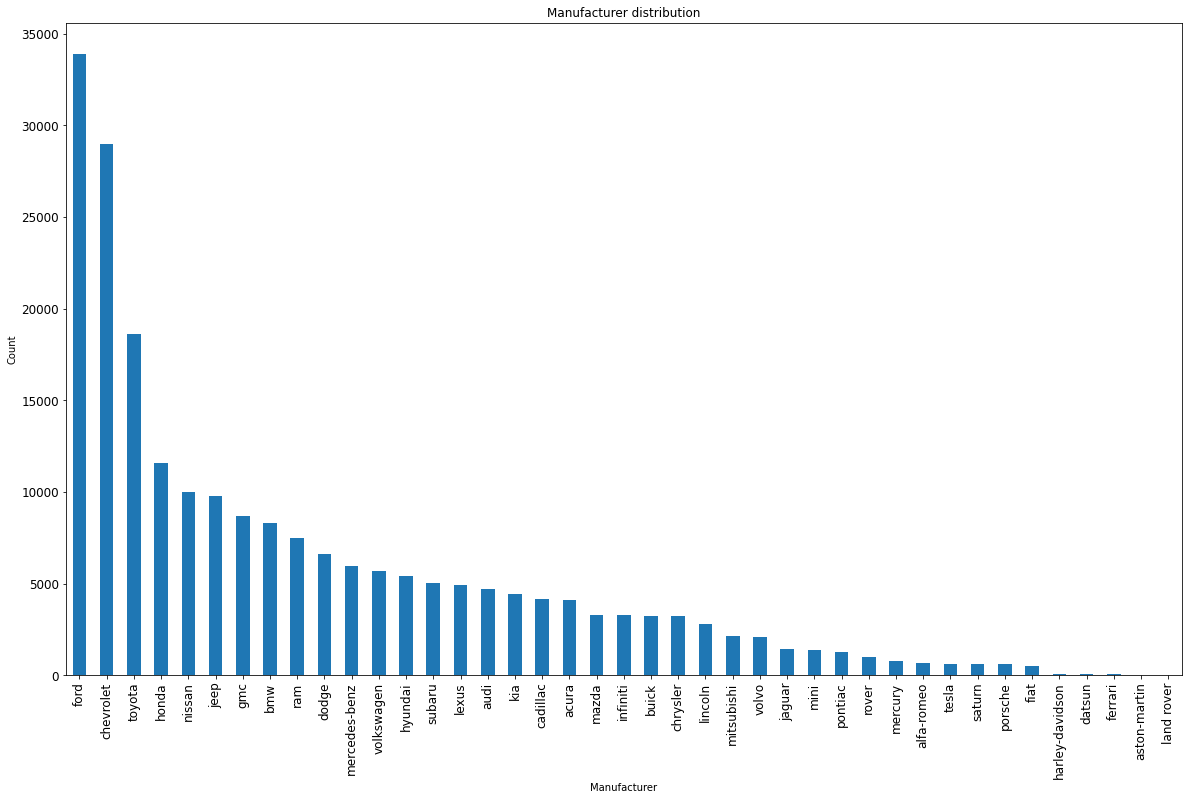

In [0]:
plt.figure(figsize=(20,12))
df.manufacturer.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Manufacturer distribution')
plt.ylabel('Count')
plt.xlabel('Manufacturer')
plt.tick_params(labelsize=12)
plt.grid([])

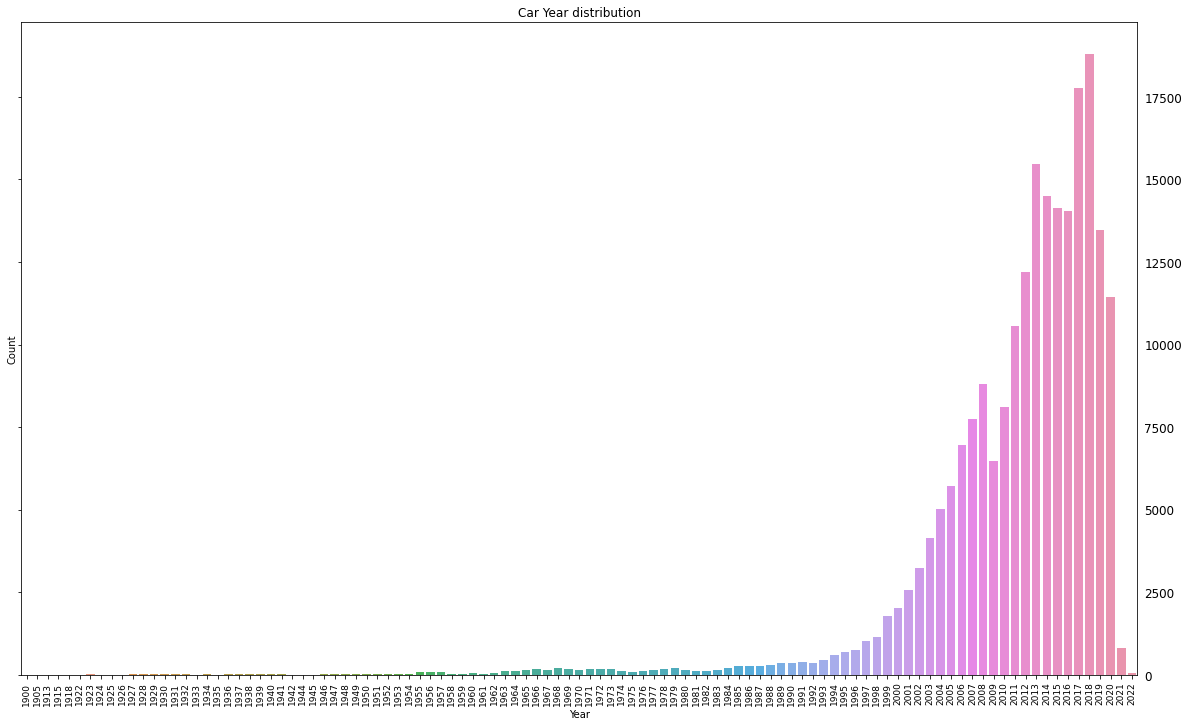

In [0]:
#car and year distribution
plt.figure(figsize=(20,12))
sns.countplot(x='year',data= df, dodge=False)
plt.title('Car Year distribution')
plt.tick_params(labelsize=12)
plt.xticks(fontsize=9,rotation=90)
plt.tick_params(axis='y', labelleft=False, labelright=True)
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [0]:
#Majority of the used car models come from 2010 - 2020. Most of the sellers tend to sell their cars around/within 10 years of ownership.

In [0]:
#creating new column for age of car
df['age'] = 2021 - (df['year'] - 1)

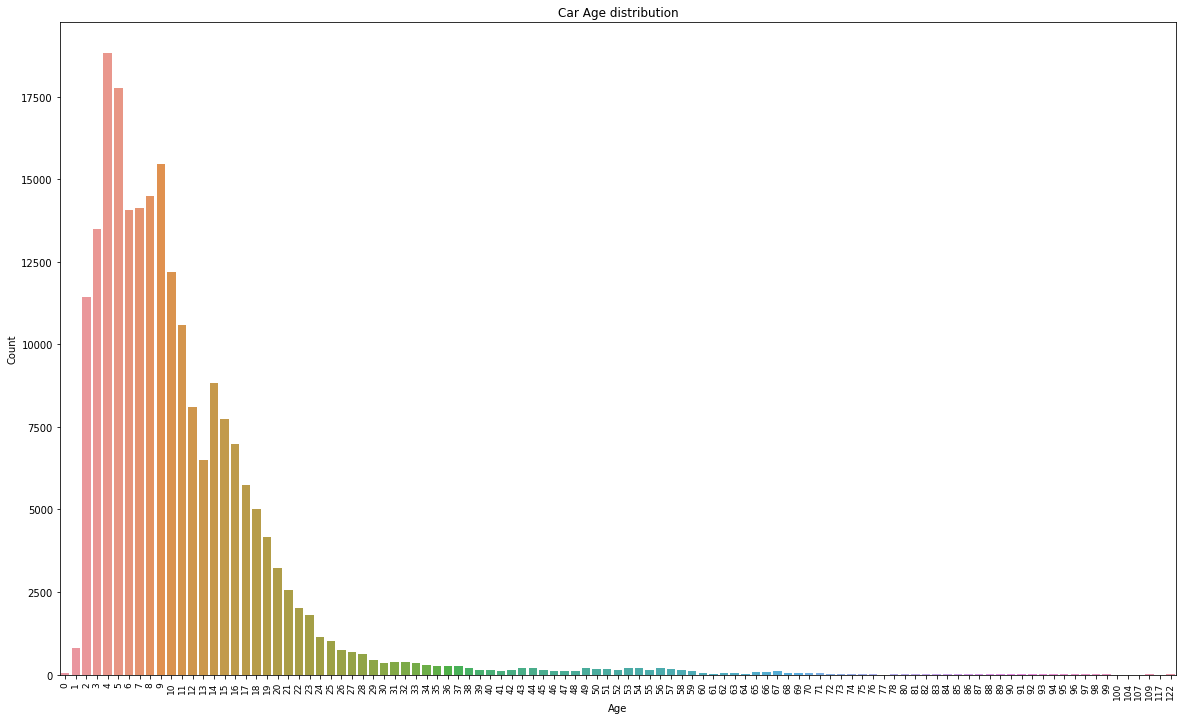

In [0]:
plt.figure(figsize=(20,12))
sns.countplot(x='age',data=df)
plt.title('Car Age distribution')
plt.xticks(fontsize=9,rotation=90)
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

In [0]:
#removing 0 year old cars
df = df.loc[~(df.age < 1)]
df.shape

Out[38]: (217385, 18)

In [0]:
df.head()

Out[39]:

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posted_monthyear,age
0,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,None,pickup,white,al,May-2021,8
1,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,None,pickup,blue,al,May-2021,12
2,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,None,pickup,red,al,May-2021,2
3,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,None,pickup,red,al,May-2021,5
4,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,May-2021,9


In [0]:
#new column for average mileage of car per year
df['avg_mil'] = df['odometer'] / df['age']
print('Average mileage of cars in the US: ', df.avg_mil.mean())

Average mileage of cars in the US: 9459.771526228955

In [0]:
mil_avg = df.avg_mil.mean()
df ['mil_rating'] = 'below average'
df.loc[df['avg_mil'] > mil_avg , 'mil_rating'] = 'above average'

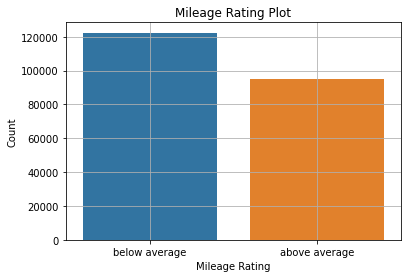

In [0]:
ax = sns.countplot(x='mil_rating',data=df)
plt.title('Mileage Rating Plot')
plt.ylabel('Count')
plt.xlabel('Mileage Rating')
plt.grid()
plt.show()

In [0]:
df.manufacturer.unique()

Out[43]: array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
 'chrysler', 'volvo', 'infiniti', 'lincoln', 'subaru', 'acura',
 'audi', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
 'alfa-romeo', 'volkswagen', 'porsche', 'kia', 'ferrari', 'pontiac',
 'fiat', 'rover', 'mini', 'saturn', 'tesla', 'mercury',
 'harley-davidson', 'datsun', 'aston-martin', 'land rover'],
 dtype=object)

In [0]:
def country(row):
  val = str(20)
  if row['manufacturer'] in ['harley-davidson', 'chevrolet', 'pontiac', 'ram', 'ford', 'gmc', 'tesla', 'jeep', 'dodge',
                             'cadillac', 'chrysler', 'lincoln', 'buick', 'saturn', 'mercury']:
    val = 'American'
  elif (row['manufacturer'] in ['lexus', 'nissan', 'toyota', 'acura', 'honda', 'infiniti', 'subaru', 'mitsubishi', 
                                'datsun', 'mazda']):
    val = 'Japanese'
  elif (row['manufacturer'] in ['volkswagen', 'mercedes-benz', 'bmw', 'audi', 'porsche']):
    val = 'German'
  elif (row['manufacturer'] in ['ferrari','fiat','alfa-romeo']):
    val = 'Italian'
  elif (row['manufacturer'] in ['kia','hyundai']):
    val = 'Korean'
  elif (row['manufacturer'] in ['volvo']):
    val = 'Swedish'
  elif (row['manufacturer'] in ['rover','mini','land rover', 'jaguar']):
    val = 'English'
  return val
df['made'] = df.apply(country, axis=1)
df.head()

Out[44]:

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posted_monthyear,age,avg_mil,mil_rating,made
0,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,None,pickup,white,al,May-2021,8,7240.375000,below average,American
1,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,None,pickup,blue,al,May-2021,12,5935.750000,below average,American
2,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,None,pickup,red,al,May-2021,2,9580.000000,above average,American
3,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,None,pickup,red,al,May-2021,5,8224.800000,below average,Japanese
4,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,May-2021,9,14222.222222,above average,American


In [0]:
#Handling other NA values by random substitution.

In [0]:
df.isna().sum()

Out[46]: id 0
region 0
price 0
year 0
manufacturer 0
model 0
condition 0
cylinders 53070
fuel 0
odometer 0
title_status 2162
transmission 0
drive 39216
type 17564
paint_color 31375
state 0
posted_monthyear 0
age 0
avg_mil 0
mil_rating 0
made 0
dtype: int64

In [0]:
#Substituting missing values in the remainder of the columns with a random variable from its unique items based on their current probability.

In [0]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(df.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
df.loc[df.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=df.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

#normalize the title status value counts and save into a dataframe
ts_prob = pd.DataFrame(list(df.title_status.value_counts(normalize=True).items()),columns = ['ts','prob'])
#substitute missing values in title_status to random states based on their probabilities
df.loc[df.title_status.isna(), 'title_status'] = np.random.choice(ts_prob.ts, 
                                                size=df.title_status.isna().sum(),
                                                replace=True, 
                                                p=ts_prob.prob)

#normalize the drive value counts and save into a dataframe
dr_prob = pd.DataFrame(list(df.drive.value_counts(normalize=True).items()),columns = ['drive','prob'])
#substitute missing values in title_status to random states based on their probabilities
df.loc[df.drive.isna(), 'drive'] = np.random.choice(dr_prob.drive, 
                                                size=df.drive.isna().sum(),
                                                replace=True, 
                                                p=dr_prob.prob)

#normalize the type value counts and save into a dataframe
type_prob = pd.DataFrame(list(df.type.value_counts(normalize=True).items()),columns = ['type','prob'])
#substitute missing values in title_status to random states based on their probabilities
df.loc[df.type.isna(), 'type'] = np.random.choice(type_prob.type, 
                                                size=df.type.isna().sum(),
                                                replace=True, 
                                                p=type_prob.prob)

#normalize the color value counts and save into a dataframe
pc_prob = pd.DataFrame(list(df.paint_color.value_counts(normalize=True).items()),columns = ['color','prob'])
#substitute missing values in title_status to random states based on their probabilities
df.loc[df.paint_color.isna(), 'paint_color'] = np.random.choice(pc_prob.color, 
                                                size=df.paint_color.isna().sum(),
                                                replace=True, 
                                                p=pc_prob.prob)

In [0]:
df.isna().sum()

Out[49]: id 0
region 0
price 0
year 0
manufacturer 0
model 0
condition 0
cylinders 0
fuel 0
odometer 0
title_status 0
transmission 0
drive 0
type 0
paint_color 0
state 0
posted_monthyear 0
age 0
avg_mil 0
mil_rating 0
made 0
dtype: int64

In [0]:
df.cylinders.value_counts()

Out[50]: 6 cylinders 85974
8 cylinders 63851
4 cylinders 63482
5 cylinders 1509
10 cylinders 1409
other 652
3 cylinders 396
12 cylinders 112
Name: cylinders, dtype: int64

In [0]:
#replacing other with NA values
df.cylinders.replace("other",np.nan,inplace=True)
df.cylinders.value_counts()

Out[51]: 6 cylinders 85974
8 cylinders 63851
4 cylinders 63482
5 cylinders 1509
10 cylinders 1409
3 cylinders 396
12 cylinders 112
Name: cylinders, dtype: int64

In [0]:
#taking care of NA values in cylinders
cyl_prob = pd.DataFrame(list(df.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
df.loc[df.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=df.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [0]:
df.cylinders.value_counts()

Out[53]: 6 cylinders 86228
8 cylinders 64054
4 cylinders 63668
5 cylinders 1514
10 cylinders 1412
3 cylinders 397
12 cylinders 112
Name: cylinders, dtype: int64

In [0]:
#removing word cylinders from clylinders column and converting it to int
df['cylinders']=df['cylinders'].apply(lambda x:x.split(' ')[0])
df['cylinders']=df['cylinders'].astype('int')
df.head()

Out[54]:

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posted_monthyear,age,avg_mil,mil_rating,made
0,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,4wd,pickup,white,al,May-2021,8,7240.375000,below average,American
1,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,fwd,pickup,blue,al,May-2021,12,5935.750000,below average,American
2,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,fwd,pickup,red,al,May-2021,2,9580.000000,above average,American
3,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,4wd,pickup,red,al,May-2021,5,8224.800000,below average,Japanese
4,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al,May-2021,9,14222.222222,above average,American


In [0]:
df.shape

Out[55]: (217385, 21)

In [0]:
#Removing outliers

na='price'
pIQR=df[na].quantile(0.75)-df[na].quantile(0.25)
pupper=df[na].quantile(0.75)+1.5*pIQR
plower=df[na].quantile(0.25)-1.5*pIQR

print(na)
print(pupper)
print(plower)


na='odometer'
oIQR=df[na].quantile(0.75)-df[na].quantile(0.25)
oupper=df[na].quantile(0.75)+1.5*oIQR
olower=df[na].quantile(0.25)-1.5*oIQR

print(na)
print(oupper)
print(olower)

df= df[df.price<pupper]
df= df[df.odometer<oupper]

price
57425.0
-23735.0
odometer
285172.5
-117167.5

In [0]:
df.shape

Out[57]: (213674, 21)

In [0]:
#Importing libraries for modelling
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
!pip install keras
!pip install tensorflow
!pip install PrettyTable
from keras.models import Sequential
from keras.layers import Dense
from prettytable import PrettyTable

Collecting xgboost
 Downloading xgboost-1.7.1-py3-none-manylinux2014_x86_64.whl (193.6 MB)
 | 10 kB 28.9 MB/s eta 0:00:07 | | 20 kB 11.0 MB/s eta 0:00:18 | | 30 kB 15.1 MB/s eta 0:00:13 | | 40 kB 14.0 MB/s eta 0:00:14 | | 51 kB 15.6 MB/s eta 0:00:13 | | 61 kB 18.0 MB/s eta 0:00:11 | | 71 kB 16.1 MB/s eta 0:00:13 | | 81 kB 16.3 MB/s eta 0:00:12 | | 92 kB 18.0 MB/s eta 0:00:11 | | 102 kB 18.3 MB/s eta 0:00:11 | | 112 kB 18.3 MB/s eta 0:00:11 | | 122 kB 18.3 MB/s eta 0:00:11 | | 133 kB 18.3 MB/s eta 0:00:11 | | 143 kB 18.3 MB/s eta 0:00:11 | | 153 kB 18.3 MB/s eta 0:00:11 | | 163 kB 18.3 MB/s eta 0:00:11 | | 174 kB 18.3 MB/s eta 0:00:11 | | 184 kB 18.3 MB/s eta 0:00:11 | | 194 kB 18.3 MB/s eta 0:00:11 | | 204 kB 18.3 MB/s eta 0:00:11 | | 215 kB 18.3 MB/s eta 0:00:11 | | 225 kB 18.3 MB/s eta 0:00:11 | | 235 kB 18.3 MB/s eta 0:00:11 | | 245 kB 18.3 MB/s eta 0:00:11 | | 256 kB 18.3 MB/s eta 0:00:11 | | 266 kB 18.3 MB/s eta 0:00:11 | | 276 kB 18.3 MB/s eta 0:00:11 | | 286 kB 18.3 MB/s eta 0:00:11 | | 296 kB 18.3 MB/s eta 0:00:11 | | 307 kB 18.3 MB/s eta 0:00:11 | | 317 kB 18.3 MB/s eta 0:00:11 | | 327 kB 18.3 MB/s eta 0:00:11 | | 337 kB 18.3 MB/s eta 0:00:11 | | 348 kB 18.3 MB/s eta 0:00:11 | | 358 kB 18.3 MB/s eta 0:00:11 | | 368 kB 18.3 MB/s eta 0:00:11 | | 378 kB 18.3 MB/s eta 0:00:11 | | 389 kB 18.3 MB/s eta 0:00:11 | | 399 kB 18.3 MB/s eta 0:00:11 | | 409 kB 18.3 MB/s eta 0:00:11 | | 419 kB 18.3 MB/s eta 0:00:11 | | 430 kB 18.3 MB/s eta 0:00:11 | | 440 kB 18.3 MB/s eta 0:00:11 | | 450 kB 18.3 MB/s eta 0:00:11 | | 460 kB 18.3 MB/s eta 0:00:11 | | 471 kB 18.3 MB/s eta 0:00:11 | | 481 kB 18.3 MB/s eta 0:00:11 | | 491 kB 18.3 MB/s eta 0:00:11 | | 501 kB 18.3 MB/s eta 0:00:11 | | 512 kB 18.3 MB/s eta 0:00:11 | | 522 kB 18.3 MB/s eta 0:00:11 | | 532 kB 18.3 MB/s eta 0:00:11 | | 542 kB 18.3 MB/s eta 0:00:11 | | 552 kB 18.3 MB/s eta 0:00:11 | | 563 kB 18.3 MB/s eta 0:00:11 | | 573 kB 18.3 MB/s eta 0:00:11 | | 583 kB 18.3 MB/s eta 0:00:11 | | 593 kB 18.3 MB/s eta 0:00:11 | | 604 kB 18.3 MB/s eta 0:00:11 | | 614 kB 18.3 MB/s eta 0:00:11 | | 624 kB 18.3 MB/s eta 0:00:11 | | 634 kB 18.3 MB/s eta 0:00:11 | | 645 kB 18.3 MB/s eta 0:00:11 | | 655 kB 18.3 MB/s eta 0:00:11 | | 665 kB 18.3 MB/s eta 0:00:11 |▏ | 675 kB 18.3 MB/s eta 0:00:11 |▏ | 686 kB 18.3 MB/s eta 0:00:11 |▏ | 696 kB 18.3 MB/s eta 0:00:11 |▏ | 706 kB 18.3 MB/s eta 0:00:11 |▏ | 716 kB 18.3 MB/s eta 0:00:11 |▏ | 727 kB 18.3 MB/s eta 0:00:11 |▏ | 737 kB 18.3 MB/s eta 0:00:11 |▏ | 747 kB 18.3 MB/s eta 0:00:11 |▏ | 757 kB 18.3 MB/s eta 0:00:11 |▏ | 768 kB 18.3 MB/s eta 0:00:11 |▏ | 778 kB 18.3 MB/s eta 0:00:11 |▏ | 788 kB 18.3 MB/s eta 0:00:11 |▏ | 798 kB 18.3 MB/s eta 0:00:11 |▏ | 808 kB 18.3 MB/s eta 0:00:11 |▏ | 819 kB 18.3 MB/s eta 0:00:11 |▏ | 829 kB 18.3 MB/s eta 0:00:11 |▏ | 839 kB 18.3 MB/s eta 0:00:11 |▏ | 849 kB 18.3 MB/s eta 0:00:11 |▏ | 860 kB 18.3 MB/s eta 0:00:11 |▏ | 870 kB 18.3 MB/s eta 0:00:11 |▏ | 880 kB 18.3 MB/s eta 0:00:11 |▏ | 890 kB 18.3 MB/s eta 0:00:11 |▏ | 901 kB 18.3 MB/s eta 0:00:11 |▏ | 911 kB 18.3 MB/s eta 0:00:11 |▏ | 921 kB 18.3 MB/s eta 0:00:11 |▏ | 931 kB 18.3 MB/s eta 0:00:11 |▏ | 942 kB 18.3 MB/s eta 0:00:11 |▏ | 952 kB 18.3 MB/s eta 0:00:11 |▏ | 962 kB 18.3 MB/s eta 0:00:11 |▏ | 972 kB 18.3 MB/s eta 0:00:11 |▏ | 983 kB 18.3 MB/s eta 0:00:11 |▏ | 993 kB 18.3 MB/s eta 0:00:11 |▏ | 1.0 MB 18.3 MB/s eta 0:00:11 |▏ | 1.0 MB 18.3 MB/s eta 0:00:11 |▏ | 1.0 MB 18.3 MB/s eta 0:00:11 |▏ | 1.0 MB 18.3 MB/s eta 0:00:11 |▏ | 1.0 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.1 MB 18.3 MB/s eta 0:00:11 |▏ | 1.2 MB 18.3 MB/s eta 0:00:11 |▏ | 1.2 MB 18.3 MB/s eta 0

In [0]:
#encoding numerical and categorical data
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(include=object)

encoding=OrdinalEncoder()

cat_cols=cat_df.columns.tolist()
encoding.fit(cat_df[cat_cols])

#transform categorical columns
cat_oe=encoding.transform(cat_df[cat_cols])
cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)
cat_df.reset_index(inplace=True,drop=True)

num_df.reset_index(inplace=True,drop=True)
cat_oe.reset_index(inplace=True,drop=True)

df_corr = pd.concat([num_df,cat_oe],axis=1)

In [0]:
df_corr.head()

Out[60]:

,id,price,year,cylinders,odometer,age,avg_mil,region,manufacturer,model,condition,fuel,title_status,transmission,drive,type,paint_color,state,posted_monthyear,mil_rating,made
0,7316814884,33590,2014,8,57923.0,8,7240.375000,16.0,14.0,12030.0,2.0,2.0,0.0,2.0,0.0,8.0,10.0,1.0,1.0,1.0,1.0
1,7316814758,22590,2010,8,71229.0,12,5935.750000,16.0,7.0,12226.0,2.0,2.0,0.0,2.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0
2,7316814989,39590,2020,8,19160.0,2,9580.000000,16.0,7.0,12237.0,2.0,2.0,0.0,2.0,1.0,8.0,8.0,1.0,1.0,0.0,1.0
3,7316743432,30990,2017,8,41124.0,5,8224.800000,16.0,38.0,14031.0,2.0,2.0,0.0,2.0,0.0,8.0,8.0,1.0,1.0,1.0,5.0
4,7316356412,15000,2013,6,128000.0,9,14222.222222,16.0,13.0,6150.0,0.0,2.0,0.0,0.0,2.0,10.0,0.0,1.0,1.0,0.0,1.0


Out[61]:

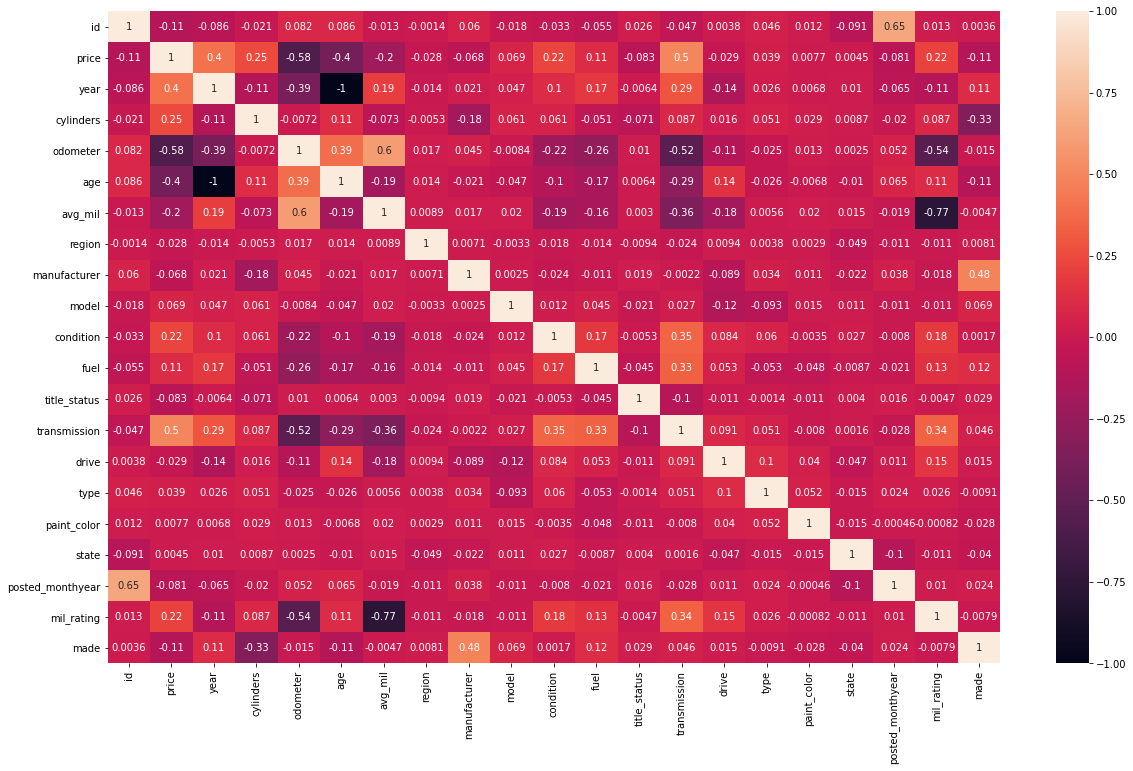

<AxesSubplot:>

In [0]:
#Correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(data=df_corr.corr(),annot=True)

In [0]:
col = ['price', 'year', 'age', 'odometer', 'cylinders', 'manufacturer', 'fuel', 'title_status', 'transmission', 'condition',  'drive', 'type']
df_modelling = df.loc[:, col]
df_modelling.head()

Out[62]:

,price,year,age,odometer,cylinders,manufacturer,fuel,title_status,transmission,condition,drive,type
0,33590,2014,8,57923.0,8,gmc,gas,clean,other,good,4wd,pickup
1,22590,2010,12,71229.0,8,chevrolet,gas,clean,other,good,fwd,pickup
2,39590,2020,2,19160.0,8,chevrolet,gas,clean,other,good,fwd,pickup
3,30990,2017,5,41124.0,8,toyota,gas,clean,other,good,4wd,pickup
4,15000,2013,9,128000.0,6,ford,gas,clean,automatic,excellent,rwd,truck


In [0]:
df_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213674 entries, 0 to 236833
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 price 213674 non-null int64 
 1 year 213674 non-null int64 
 2 age 213674 non-null int64 
 3 odometer 213674 non-null float64
 4 cylinders 213674 non-null int64 
 5 manufacturer 213674 non-null object 
 6 fuel 213674 non-null object 
 7 title_status 213674 non-null object 
 8 transmission 213674 non-null object 
 9 condition 213674 non-null object 
 10 drive 213674 non-null object 
 11 type 213674 non-null object 
dtypes: float64(1), int64(4), object(7)
memory usage: 21.2+ MB

In [0]:
df_label = df_modelling

le_manufacturer = LabelEncoder()
le_fuel = LabelEncoder()
le_title_status = LabelEncoder()
le_transmission = LabelEncoder()
le_condition = LabelEncoder()
le_drive = LabelEncoder()
le_type = LabelEncoder()

df_label["type"] = le_type.fit_transform(df_label['type'])
df_label["manufacturer"] = le_manufacturer.fit_transform(df_label['manufacturer'])
df_label['drive'] = le_drive.fit_transform(df_label['drive'])
df_label["fuel"] = le_fuel.fit_transform(df_label['fuel'])
df_label["title_status"] = le_title_status.fit_transform(df_label['title_status'])
df_label['transmission'] = le_transmission.fit_transform(df_label['transmission'])
df_label['condition'] = le_condition.fit_transform(df_label['condition'])

df_label.head()

Out[64]:

,price,year,age,odometer,cylinders,manufacturer,fuel,title_status,transmission,condition,drive,type
0,33590,2014,8,57923.0,8,14,2,0,2,2,0,8
1,22590,2010,12,71229.0,8,7,2,0,2,2,1,8
2,39590,2020,2,19160.0,8,7,2,0,2,2,1,8
3,30990,2017,5,41124.0,8,38,2,0,2,2,0,8
4,15000,2013,9,128000.0,6,13,2,0,0,0,2,10


In [0]:
#Splitting data 80-20 into train and test respectively
X = df_label.drop('price', axis = 1)
y = df_label['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [0]:
#Building 3 machine models - Linear Regression, Random Forest, XGBoost models. We will evaluate their performance using several metrics to pick best performing model for our price prediction.

In [0]:
#Building model

def train_model(x, y, model_type):
    
    if model_type == 'lr':
        model=LinearRegression()
    elif model_type == 'rf':
        model=RandomForestRegressor()
    elif model_type == 'xgb':
        model=XGBRegressor()

    model.fit(x,y)
    
    return model

model_lr = train_model(X_train, y_train, 'lr')

model_xgb = train_model(X_train, y_train, 'xgb')

model_rf = train_model(X_train, y_train, 'rf')

In [0]:
#Evaluating model

def evaluate_model(model, x, y):
    predictions = model.predict(x)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    mape = mean_absolute_percentage_error(y, predictions)
    
    mse = round(mse,2)
    mae = round(mae,2)
    mape = round(mape,2)
    
    return [mse,mae,mape]

summary = PrettyTable(['Model','MSE','MAE','MAPE'])
summary.add_row(['LR']+ evaluate_model(model_lr, X_test, y_test))
summary.add_row(['RF']+ evaluate_model(model_rf, X_test, y_test))
summary.add_row(['XGB']+ evaluate_model(model_xgb, X_test, y_test))


print(summary)

+-------+-------------+---------+------------------------+
 Model | MSE | MAE | MAPE |
+-------+-------------+---------+------------------------+
 LR | 79054993.47 | 6496.0 | 2.819051467709661e+18 |
 RF | 26766136.17 | 2568.03 | 1.7249026954848986e+18 |
 XGB | 37340982.63 | 3793.48 | 2.568910785791852e+18 |
+-------+-------------+---------+------------------------+

In [0]:
#Random Forest Model seems to be performing the best as it has lowest evaluation metrics

rf = X_train.join(y_train)
price_pred_df= rf.join(pd.Series(model_rf.predict(X_train), name='price_pred'))

In [0]:
price_pred_df = spark.createDataFrame(price_pred_df)

In [0]:
write the dataframe as a single file to blob storage
(price_pred_df
 .coalesce(1)
 .write
 .mode("overwrite")
 .option("header", "true")
 .format("com.databricks.spark.csv")
 .save(output_blob_folder))

In [0]:
#price_pred_df.write.csv("/FileStore/output/predictions.csv")

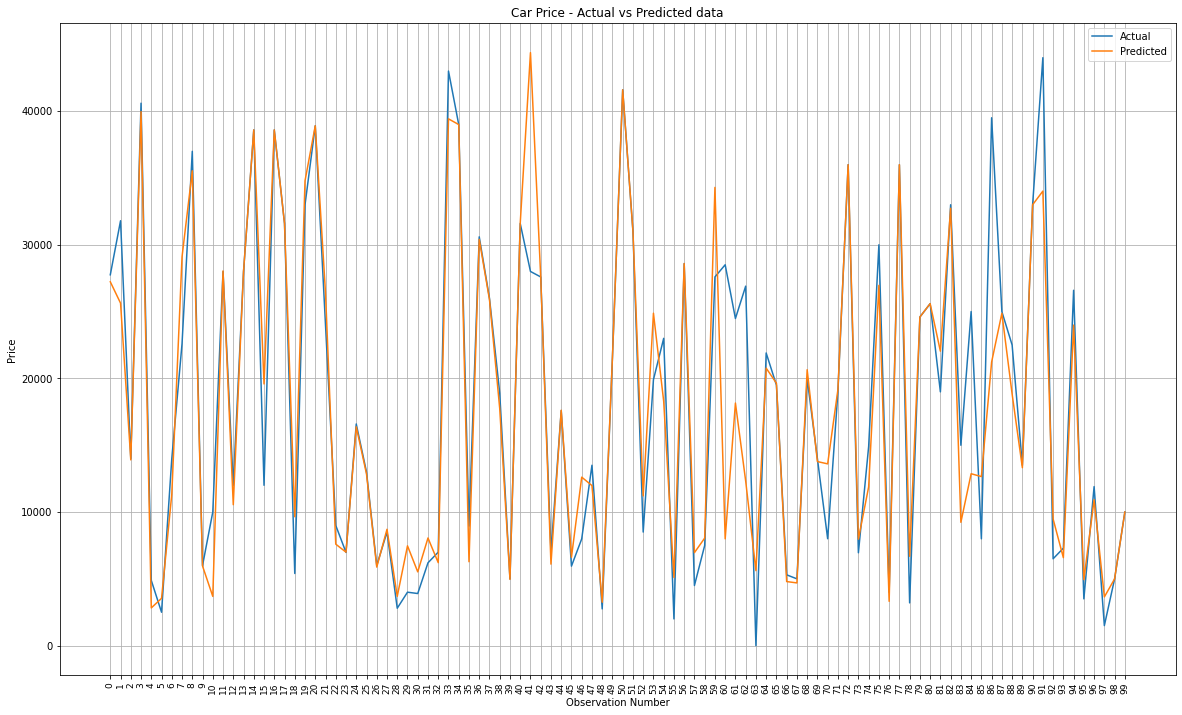

In [0]:
#actual vs the predicted price plot

y_pred=(model_rf.predict(X_test))

n = 100

x_ax = range(len(y_test[:n]))

plt.figure(figsize=(20,12))
plt.plot(x_ax, y_test[:n], label="Actual")
plt.plot(x_ax, y_pred[:n], label="Predicted")
plt.title("Car Price - Actual vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(n))
plt.xticks(fontsize=9,rotation=90)
plt.legend()
plt.grid()
plt.show()

In [0]:
#price_pred_df.head()

In [0]:
#price_pred_df['price_pred'].isna().sum()